In [ ]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('/content/Tel_CC.csv')

FileNotFoundError: ignored

In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')
dataset['TotalCharges'] = dataset['TotalCharges'].astype("float")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataset.info()

dataset.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   MultipleLines_No                         7043 non-null   uint8  
 10  MultipleLines_No phone service           7043 no

gender                                     False
SeniorCitizen                              False
Partner                                    False
Dependents                                 False
tenure                                     False
PhoneService                               False
PaperlessBilling                           False
MonthlyCharges                             False
TotalCharges                                True
MultipleLines_No                           False
MultipleLines_No phone service             False
MultipleLines_Yes                          False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                         False
OnlineSecurity_No                          False
OnlineSecurity_No internet service         False
OnlineSecurity_Yes                         False
OnlineBackup_No                            False
OnlineBackup_No internet service           False
OnlineBackup_Yes    

In [ ]:

#*Find the average and fill missing values of each columns programmatically.

na_cols = dataset.isna().any()

na_cols = na_cols[na_cols == True].reset_index()

na_cols = na_cols["index"].tolist()

for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

#Revalidate:
  
dataset.isna().any()  

gender                                     False
SeniorCitizen                              False
Partner                                    False
Dependents                                 False
tenure                                     False
PhoneService                               False
PaperlessBilling                           False
MonthlyCharges                             False
TotalCharges                               False
MultipleLines_No                           False
MultipleLines_No phone service             False
MultipleLines_Yes                          False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                         False
OnlineSecurity_No                          False
OnlineSecurity_No internet service         False
OnlineSecurity_Yes                         False
OnlineBackup_No                            False
OnlineBackup_No internet service           False
OnlineBackup_Yes    

In [ ]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique 

le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


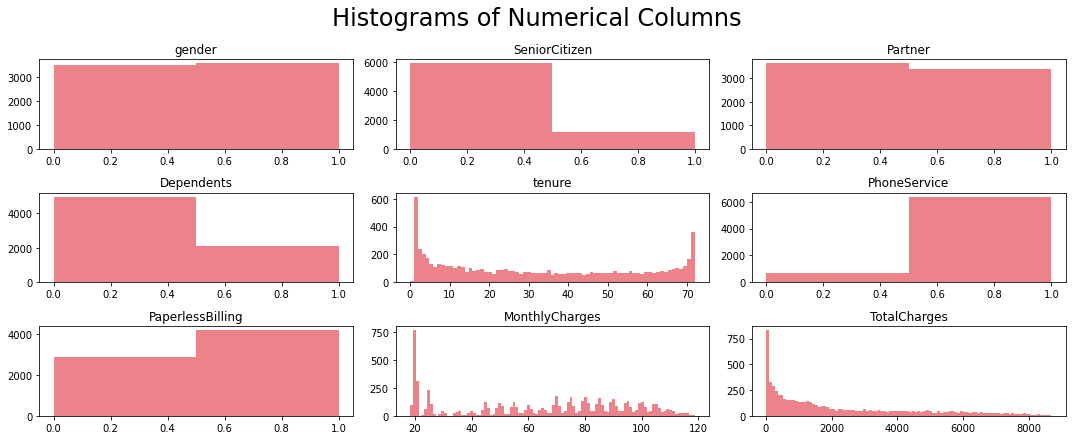

In [ ]:
dataset2 = dataset[['gender', 
'SeniorCitizen', 'Partner','Dependents',
'tenure', 'PhoneService', 'PaperlessBilling',
'MonthlyCharges', 'TotalCharges']]
#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
      vals = 100
    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

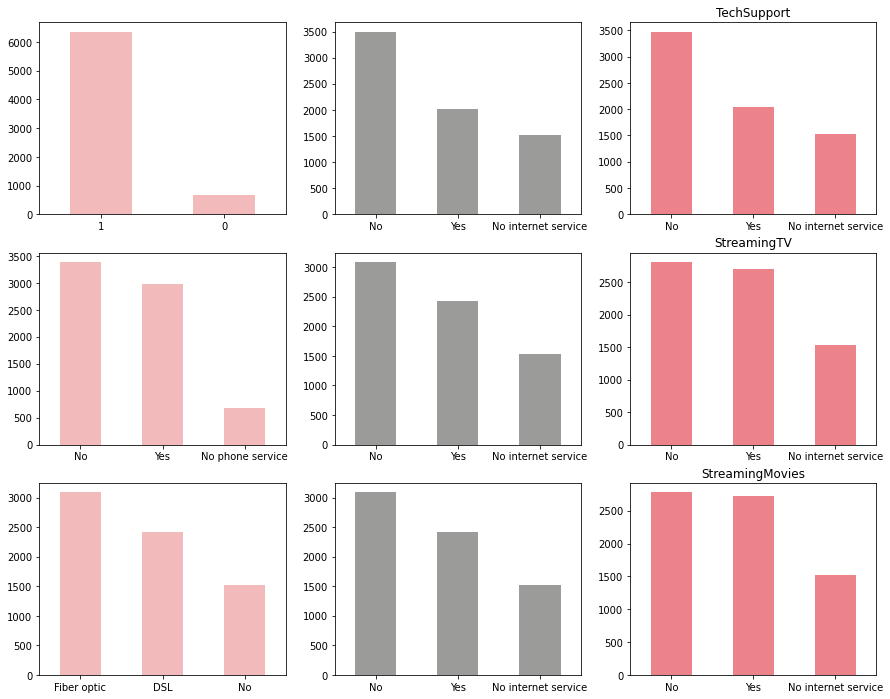

In [ ]:
services= ['PhoneService','MultipleLines',
'InternetService','OnlineSecurity',  'OnlineBackup','DeviceProtection',
'TechSupport','StreamingTV','StreamingMovies']
fig, axes = plt.subplots(nrows = 3,ncols = 3,
figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
      ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )
        
    elif i >=3 and i < 6:
      ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#9b9c9a')
        
    elif i < 9:
      ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')
      ax.set_title(item)

#Plot positive & negative correlations:

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

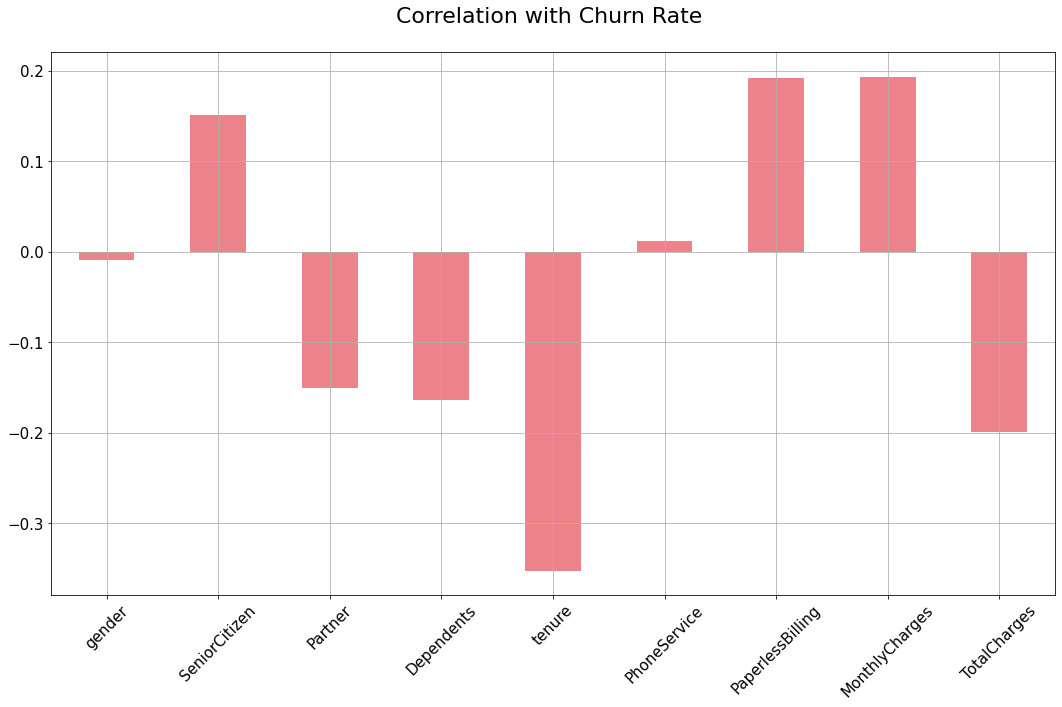

In [ ]:
correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


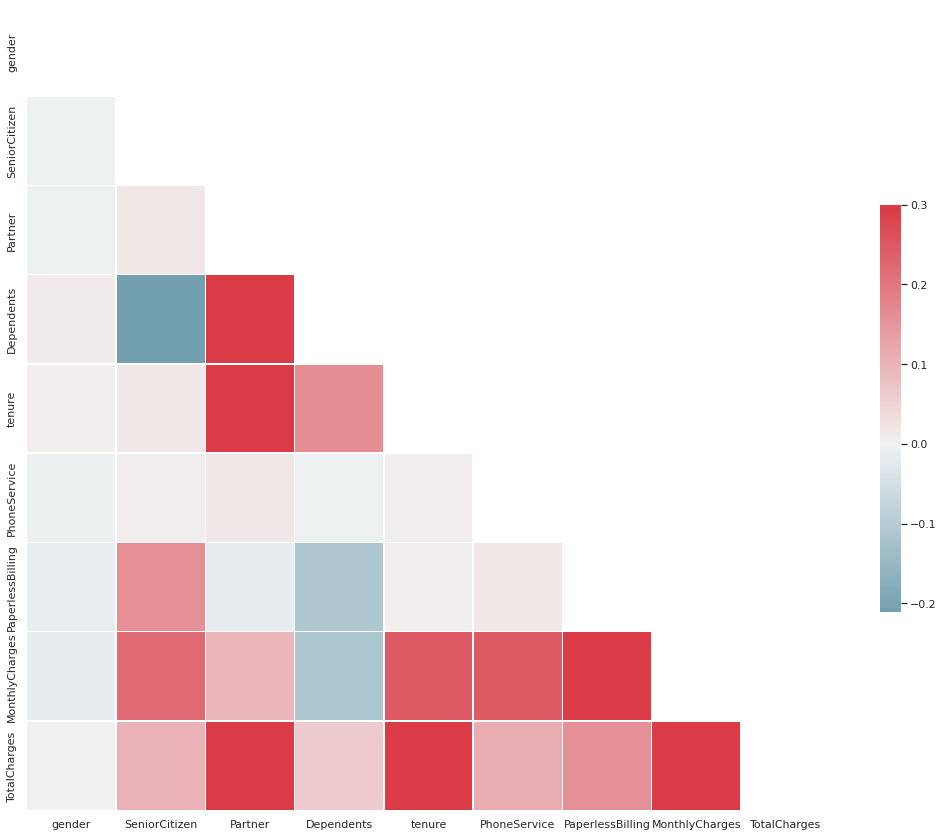

In [ ]:
#Set and compute the Correlation Matrix:
sn.set(style="white")
corr = dataset2.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#Incase if user_id is an object:
    
identity = dataset["customerID"]
dataset = dataset.drop(columns="customerID")
#Convert rest of categorical variable into dummy:
dataset= pd.get_dummies(dataset)
#Rejoin userid to dataset:
dataset = pd.concat([dataset, identity], axis = 1)

In [ ]:
#Identify response variable:
    
response = dataset["Churn"]
dataset = dataset.drop(columns="Churn")

KeyError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (dataset, response,stratify=response, test_size = 0.3)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (4930, 41)
Number transactions y_train dataset:  (4930,)
Number transactions X_test dataset:  (2113, 41)
Number transactions y_test dataset:  (2113,)


In [ ]:
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])
test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

KeyError: ignored

In [ ]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))


models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))


models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))


models.append(('Gaussian NB', GaussianNB()))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))



#Evaluating Model Results: 

    
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
  kfold = model_selection.KFold(n_splits=10) 
  cv_acc_results = model_selection.cross_val_score( model, X_train, y_train, cv=kfold, scoring='accuracy')
  cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(name)
  model_results.loc[i] = [name, round(cv_auc_results.mean()*100, 2),round(cv_auc_results.std()*100, 2),round(cv_acc_results.mean()*100, 2),round(cv_acc_results.std()*100, 2)]
  i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,85.11,1.73,75.42,1.45
1,SVC,83.93,1.72,80.34,1.55
6,Random Forest,83.20,1.95,79.37,1.38
4,Gaussian NB,82.25,1.97,70.53,1.43
2,Kernel SVM,81.53,2.03,80.12,1.27
3,KNN,78.22,2.63,76.17,1.98
5,Decision Tree Classifier,67.01,2.54,73.81,1.59


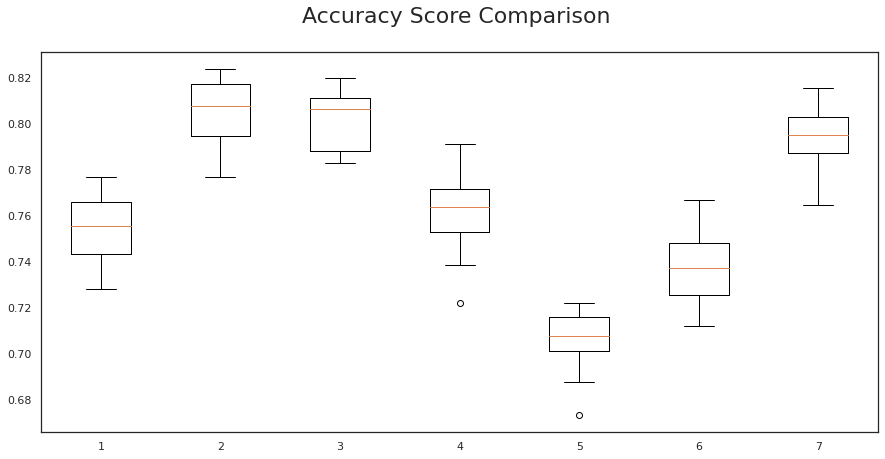

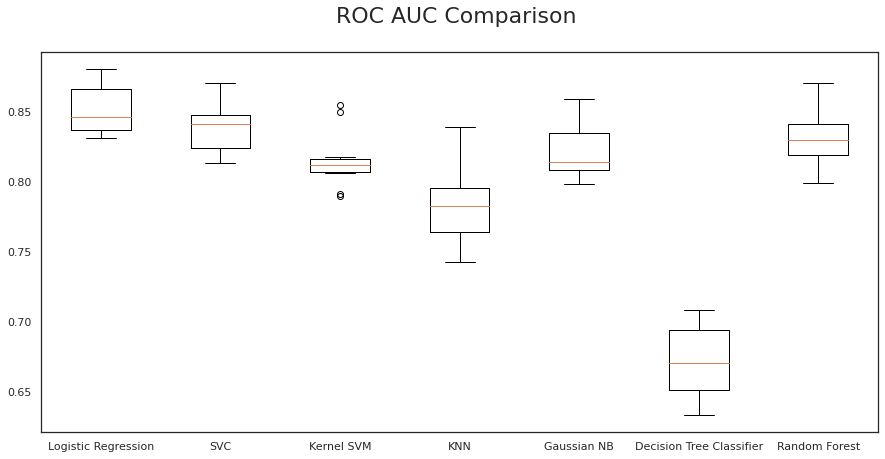

In [ ]:
ig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
classifier.fit(X_train, y_train)
 
classifier.score(X_test, y_test)

0.7799337434926644

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1391  161]
 [ 302  259]]


In [ ]:
! pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%writefile cc_an.py
import streamlit as st
st.title('Custome Churn Analysis')
up_file= st.file_uploader("Choose a CSV file", accept_multiple_files=False)
bytes_data = up_file.read()
st.write("filename:", up_file.name)
st.write(bytes_data)

Overwriting cc_an.py


In [ ]:
!streamlit run cc_an.py --server.enableXsrfProtection=false

Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 5, in <module>
    from streamlit.web.cli import main
  File "/usr/local/lib/python3.7/dist-packages/streamlit/__init__.py", line 55, in <module>
    from streamlit.delta_generator import DeltaGenerator as _DeltaGenerator
  File "/usr/local/lib/python3.7/dist-packages/streamlit/delta_generator.py", line 45, in <module>
    from streamlit.elements.arrow_altair import ArrowAltairMixin
  File "/usr/local/lib/python3.7/dist-packages/streamlit/elements/arrow_altair.py", line 42, in <module>
    from streamlit.elements.utils import last_index_for_melted_dataframes
  File "/usr/local/lib/python3.7/dist-packages/streamlit/elements/utils.py", line 82, in <module>
    ) -> LabelVisibilityMessage.LabelVisibilityOptions.ValueType:
  File "/usr/local/lib/python3.7/dist-packages/google/protobuf/internal/enum_type_wrapper.py", line 115, in __getattr__
    self._enum_type.name, name))
AttributeError: Enum LabelVisibilityOptions

In [ ]:
!streamlit run cc_an.py --server.port=8501

Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 5, in <module>
    from streamlit.web.cli import main
  File "/usr/local/lib/python3.7/dist-packages/streamlit/__init__.py", line 55, in <module>
    from streamlit.delta_generator import DeltaGenerator as _DeltaGenerator
  File "/usr/local/lib/python3.7/dist-packages/streamlit/delta_generator.py", line 45, in <module>
    from streamlit.elements.arrow_altair import ArrowAltairMixin
  File "/usr/local/lib/python3.7/dist-packages/streamlit/elements/arrow_altair.py", line 42, in <module>
    from streamlit.elements.utils import last_index_for_melted_dataframes
  File "/usr/local/lib/python3.7/dist-packages/streamlit/elements/utils.py", line 82, in <module>
    ) -> LabelVisibilityMessage.LabelVisibilityOptions.ValueType:
  File "/usr/local/lib/python3.7/dist-packages/google/protobuf/internal/enum_type_wrapper.py", line 115, in __getattr__
    self._enum_type.name, name))
AttributeError: Enum LabelVisibilityOptions

In [ ]:
%%writefile cc_an.py
import streamlit as st
st.title('Custome Churn Analysis')

Overwriting cc_an.py


In [ ]:
!streamlit run cc_an.py & npx localtunnel --port 80

Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 5, in <module>
    from streamlit.web.cli import main
  File "/usr/local/lib/python3.7/dist-packages/streamlit/__init__.py", line 55, in <module>
    from streamlit.delta_generator import DeltaGenerator as _DeltaGenerator
  File "/usr/local/lib/python3.7/dist-packages/streamlit/delta_generator.py", line 45, in <module>
    from streamlit.elements.arrow_altair import ArrowAltairMixin
  File "/usr/local/lib/python3.7/dist-packages/streamlit/elements/arrow_altair.py", line 42, in <module>
    from streamlit.elements.utils import last_index_for_melted_dataframes
  File "/usr/local/lib/python3.7/dist-packages/streamlit/elements/utils.py", line 82, in <module>
    ) -> LabelVisibilityMessage.LabelVisibilityOptions.ValueType:
  File "/usr/local/lib/python3.7/dist-packages/google/protobuf/internal/enum_type_wrapper.py", line 115, in __getattr__
    self._enum_type.name, name))
AttributeError: Enum LabelVisibilityOptions

In [ ]:
!pip install -q streamlit

     |████████████████████████████████| 10.3 MB 5.2 MB/s 
     |████████████████████████████████| 78 kB 6.2 MB/s 
     |████████████████████████████████| 237 kB 58.5 MB/s 
     |████████████████████████████████| 164 kB 53.3 MB/s 
     |████████████████████████████████| 182 kB 71.0 MB/s 
     |████████████████████████████████| 4.7 MB 42.6 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 51 kB 6.5 MB/s 


In [ ]:
%%writefile cc_an.py
import streamlit as st
st.title('Custome Churn Analysis')
rad=st.sidebar.radio("Navigation",["Home","Customer Churn Analysis"])

if rad=="Home":
  st.header('Project submission ')
  st.subheader('Radhika --1917631')

if rad=="Customer Churn Analysis":
  up_file= st.file_uploader("Choose a CSV file", accept_multiple_files=False)
  bytes_data = up_file.read()
  st.write("filename:", up_file.name)
  st.write(bytes_data)
  import numpy as np
  import matplotlib.pyplot as plt

  import pandas as pd
  df = pd.read_csv(up_file)
  st.write(df.head())

Overwriting cc_an.py


In [ ]:
!streamlit run /content/cc_an.py & npx localtunnel --port 8501

[#######...........] / extract:localtunnel: verb lock using /root/.npm/_locks/s

npx: installed 22 in 2.893s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://104.154.205.162:8501

your url is: https://sixty-cups-juggle-104-154-205-162.loca.lt
2022-11-22 16:42:52.081 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 564, in _run_script
    exec(code, module.__dict__)
  File "/content/cc_an.py", line 11, in <module>
    bytes_data = up_file.read()
AttributeError: 'NoneType' object has no attribute 'read'
2022-11-22 16:43:09.567 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 564, in _run_script
    exec(code, module.__dict__)
  File "/content/cc_an.py", line 18, in <module>
    df = pd.read_csv(up_file